<span style="font-size: 40px;">Heart Disease Prediction.</span>

<span style="font-size: 30px;">Importing the Libraries & Loading data .</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
data = pd.read_csv('/home/rahul/Mohit/Downloads/Data/heart.csv')
Xdata=data.copy()
DATA=data.copy()

data.head()

Age  Sex  Chest Pain  Blood Pressure  Cholesterol  Sugar Level  \
0   63    1           3             145          233            1   
1   37    1           2             130          250            0   
2   41    0           1             130          204            0   
3   56    1           1             120          236            0   
4   57    0           0             120          354            0   

   Resting Electrocardiographic  Max Heart Rate  Angina  Depression  \
0                             0             150       0         2.3   
1                             1             187       0         3.5   
2                             0             172       0         1.4   
3                             1             178       0         0.8   
4                             1             163       1         0.6   

   Exercise Slope  Vessels Numbers  Thalium Stress  Target  
0               0                0               1       1  
1               0                0               2       1  
2               2                0               2       1  
3               2                0               2       1  
4               2                0               2       1

| Variable | Description |
|----------|-------------|
| Age      | Age of the patient in years. |
| Sex      | Gender of the patient (0 = male, 1 = female). |
| Chest Pain      | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic. |
| Blood Pressure | Resting blood pressure in mm Hg. |
| Cholesterol     | Serum cholesterol in mg/dl. |
| Sugar Level      | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false). |
| Resting electrocardiographic  | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy. |
| Max Heart Rate  | Maximum heart rate achieved during a stress test. |
| Angina    | Exercise-induced angina (1 = yes, 0 = no). |
| Depression  | ST depression induced by exercise relative to rest. |
| Exercise Slope    | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping. |
| Vessels Numbers      | Number of major vessels (0-4) colored by fluoroscopy. |
| Thalium Stress     | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described. |
| Target   | Heart disease status (0 = no disease, 1 = presence of disease). |


<span style="font-size: 30px;">One-hot Encoding.</span>


In [3]:

# Create new columns for subcategories within 'Chest Pain'

data['Typical Angina'] = 0
data['Atypical Angina'] = 0
data['Non-Anginal Pain'] = 0
data['Asymptomatic'] = 0

# Assign 1 to the corresponding new column based on the 'mode' value
data.loc[data['Chest Pain'] == 0, 'Typical Angina'] = 1
data.loc[data['Chest Pain'] == 1, 'Atypical Angina'] = 1
data.loc[data['Chest Pain'] == 2, 'Non-Anginal Pain'] = 1
data.loc[data['Chest Pain'] == 3, 'Asymptomatic'] = 1



# Create new columns for subcategories within 'Resting electrocardiographic'
data['Normal Resting ECG'] = 0
data['ST-T Abnormality'] = 0
data['Left Ventricular Hypertrophy'] = 0

# Assign 1 to the corresponding new column based on the 'Resting electrocardiographic' value
data.loc[data['Resting Electrocardiographic'] == 0, 'Normal Resting ECG'] = 1
data.loc[data['Resting Electrocardiographic'] == 1, 'ST-T Abnormality'] = 1
data.loc[data['Resting Electrocardiographic'] == 2, 'Left Ventricular Hypertrophy'] = 1



# Create new columns for subcategories within 'Exercise Slope'
data['Upsloping'] = 0
data['Flat'] = 0
data['Downsloping'] = 0

# Assign 1 to the corresponding new column based on the 'Exercise Slope' value
data.loc[data['Exercise Slope'] == 0, 'Upsloping'] = 1
data.loc[data['Exercise Slope'] == 1, 'Flat'] = 1
data.loc[data['Exercise Slope'] == 2, 'Downsloping'] = 1



# Create new columns for subcategories within 'Thalium Stress'
data['Normal Thalium Stress'] = 0
data['Fixed Defect'] = 0
data['Reversible Defect'] = 0
data['Not Described'] = 0

# Assign 1 to the corresponding new column based on the 'Thalium Stress' value
data.loc[data['Thalium Stress'] == 0, 'Normal Thalium Stress'] = 1
data.loc[data['Thalium Stress'] == 1, 'Fixed Defect'] = 1
data.loc[data['Thalium Stress'] == 2, 'Reversible Defect'] = 1
data.loc[data['Thalium Stress'] == 3, 'Not Described'] = 1



# Drop the original  columns - 
#Chest Pain, Resting Electrocardiographic, Exercise Slope and Thalium Stress
data.drop(columns=['Chest Pain'], inplace=True)
data.drop(columns=['Resting Electrocardiographic'], inplace=True)
data.drop(columns=['Exercise Slope'], inplace=True)
data.drop(columns=['Thalium Stress'], inplace=True)

# Now df contains three new columns for 'easy', 'normal', and 'hard'
#print(data)
data

Age  Sex  Blood Pressure  Cholesterol  Sugar Level  Max Heart Rate  \
0     63    1             145          233            1             150   
1     37    1             130          250            0             187   
2     41    0             130          204            0             172   
3     56    1             120          236            0             178   
4     57    0             120          354            0             163   
..   ...  ...             ...          ...          ...             ...   
298   57    0             140          241            0             123   
299   45    1             110          264            0             132   
300   68    1             144          193            1             141   
301   57    1             130          131            0             115   
302   57    0             130          236            0             174   

     Angina  Depression  Vessels Numbers  Target  ...  Normal Resting ECG  \
0         0         2.3                0       1  ...                   1   
1         0         3.5                0       1  ...                   0   
2         0         1.4                0       1  ...                   1   
3         0         0.8                0       1  ...                   0   
4         1         0.6                0       1  ...                   0   
..      ...         ...              ...     ...  ...                 ...   
298       1         0.2                0       0  ...                   0   
299       0         1.2                0       0  ...                   0   
300       0         3.4                2       0  ...                   0   
301       1         1.2                1       0  ...                   0   
302       0         0.0                1       0  ...                   1   

     ST-T Abnormality  Left Ventricular Hypertrophy  Upsloping  Flat  \
0                   0                             0          1     0   
1                   1                             0          1     0   
2                   0                             0          0     0   
3                   1                             0          0     0   
4                   1                             0          0     0   
..                ...                           ...        ...   ...   
298                 1                             0          0     1   
299                 1                             0          0     1   
300                 1                             0          0     1   
301                 1                             0          0     1   
302                 0                             0          0     1   

     Downsloping  Normal Thalium Stress  Fixed Defect  Reversible Defect  \
0              0                      0             1                  0   
1              0                      0             0                  1   
2              1                      0             0                  1   
3              1                      0             0                  1   
4              1                      0             0                  1   
..           ...                    ...           ...                ...   
298            0                      0             0                  0   
299            0                      0             0                  0   
300            0                      0             0                  0   
301            0                      0             0                  0   
302            0                      0             0                  1   

     Not Described  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
298              1  
299              1  
300              1  
301              1  
302              0  

[303 rows x 24 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           303 non-null    int64  
 1   Sex                           303 non-null    int64  
 2   Blood Pressure                303 non-null    int64  
 3   Cholesterol                   303 non-null    int64  
 4   Sugar Level                   303 non-null    int64  
 5   Max Heart Rate                303 non-null    int64  
 6   Angina                        303 non-null    int64  
 7   Depression                    303 non-null    float64
 8   Vessels Numbers               303 non-null    int64  
 9   Target                        303 non-null    int64  
 10  Typical Angina                303 non-null    int64  
 11  Atypical Angina               303 non-null    int64  
 12  Non-Anginal Pain              303 non-null    int64  
 13  Asymp

In [5]:
# Method 1: Using Indexing
columns = data[['Age', 'Blood Pressure', 'Cholesterol','Max Heart Rate','Depression']]
columns.describe().T

count        mean        std    min    25%    50%    75%  \
Age             303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   
Blood Pressure  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0   
Cholesterol     303.0  246.264026  51.830751  126.0  211.0  240.0  274.5   
Max Heart Rate  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0   
Depression      303.0    1.039604   1.161075    0.0    0.0    0.8    1.6   

                  max  
Age              77.0  
Blood Pressure  200.0  
Cholesterol     564.0  
Max Heart Rate  202.0  
Depression        6.2

<span style="font-size: 30px;">Data Visualization & Analysis.</span>

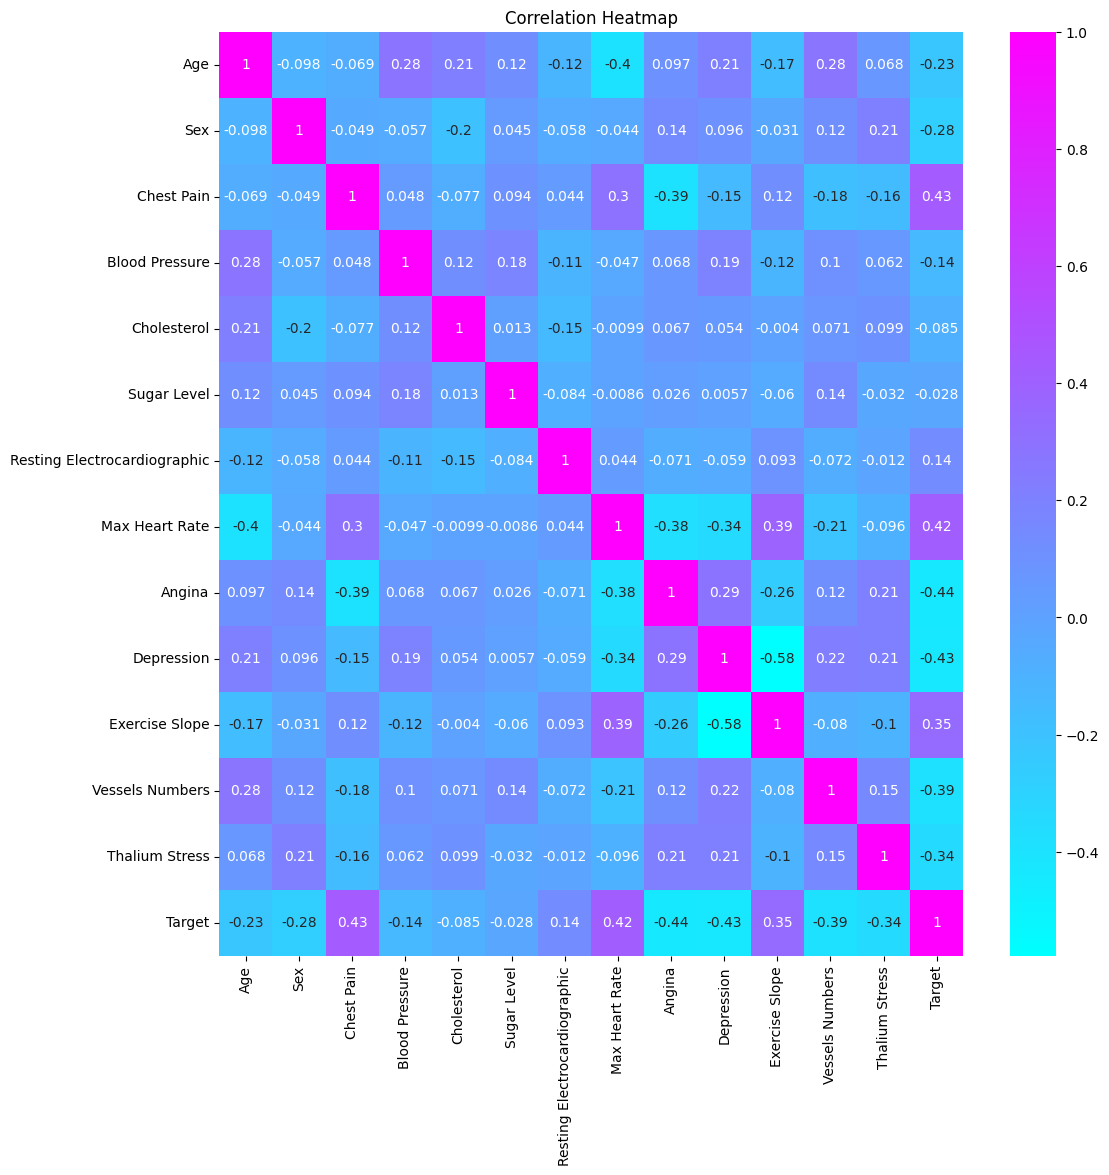

In [6]:
#correlation matrix 
correlation_matrix = DATA.corr()

plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title("Correlation Heatmap")
plt.show()

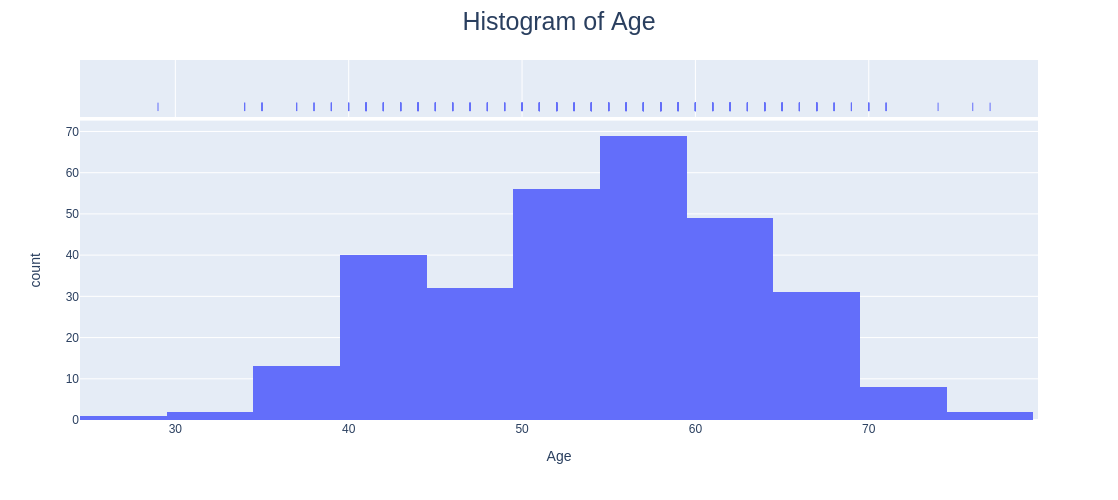

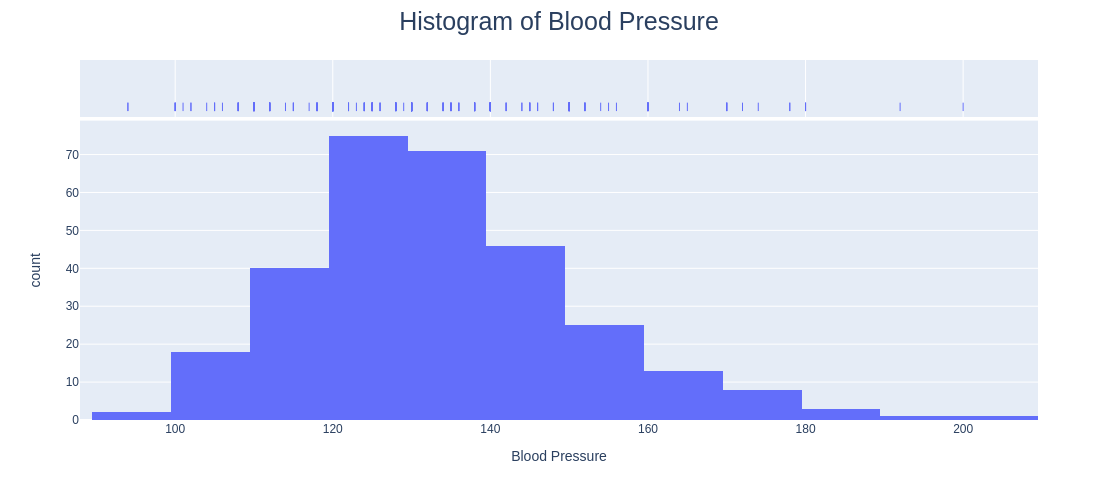

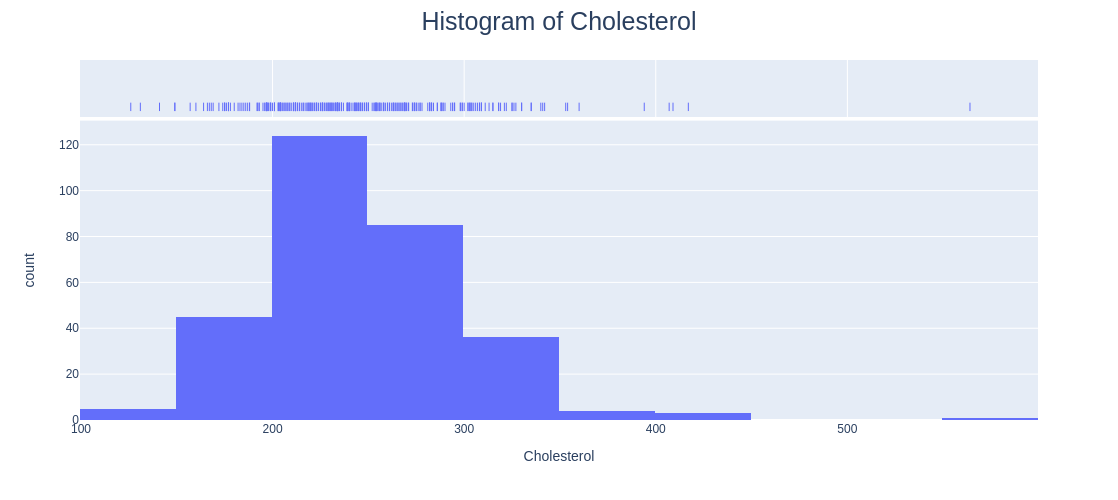

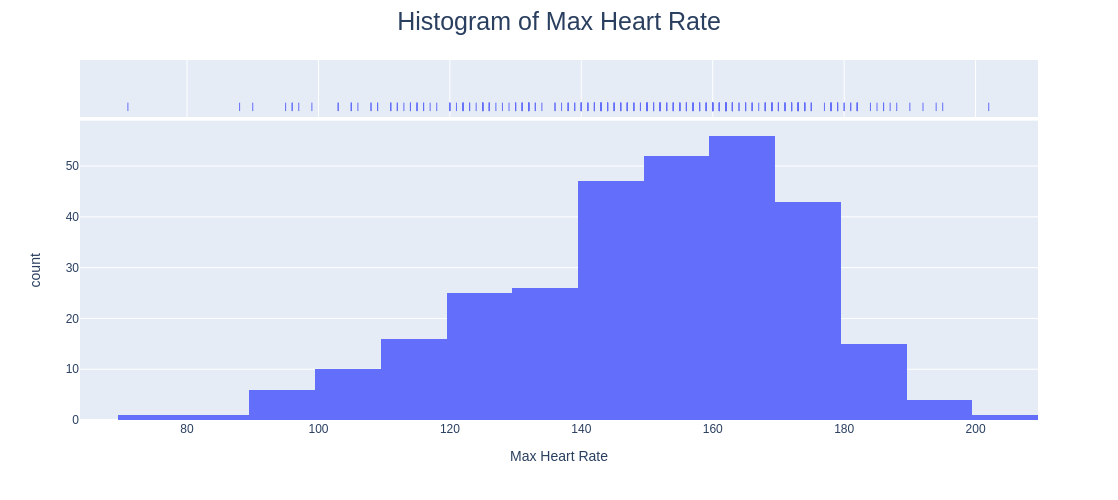

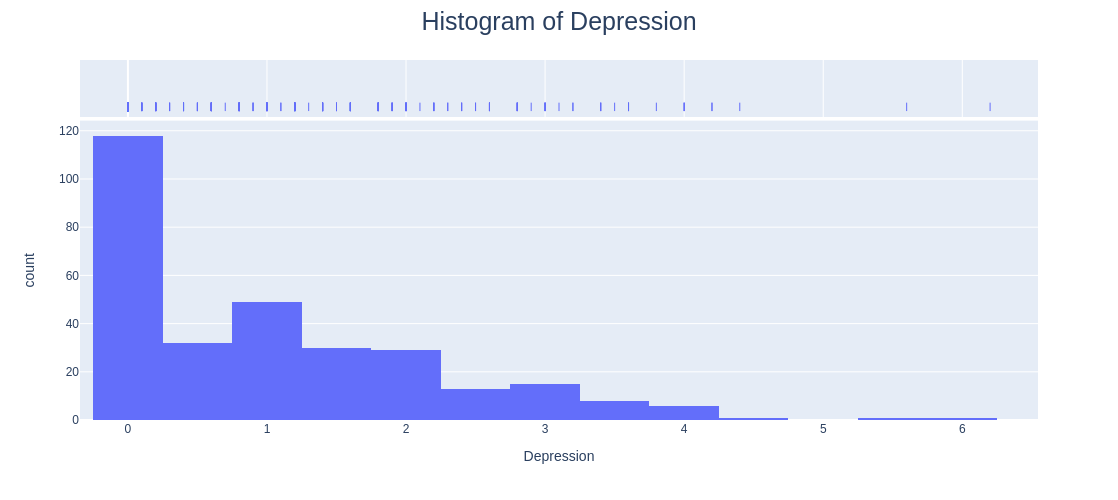

In [7]:
#Histogram Plots of 'Age', 'Blood Pressure', 'Cholesterol','Max Heart Rate' and 'Depression'

for col in columns:
    fig = px.histogram(data, x=col, marginal='rug', width=1000, height=500,nbins=15,)
    fig.update_layout(title={'text': 'Histogram of ' +  col, 'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})

    fig.show()

In [8]:
# import plotly.express as px

# # Calculate the count of each category in the 'Sex' column
# sex_counts = data['Sex'].value_counts()

# # Create a pie chart using Plotly Express
# fig = px.pie(names=['Female', 'Male'], values=sex_counts.values,
#              title='Pie chart of Sex',
#              labels={'names': 'Sex'},  # Rename the 'names' column to 'Sex'
#              width=800, height=1000)

# # Update layout to center the title
# fig.update_layout(height=800, width=1000, title={'text': 'Pie chart of Sex', 'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})

# # Show the plot
# fig.show()



# sugar_counts = data['Sugar Level'].value_counts()

# fig = px.pie(names=['Below 120 mg/dl', 'Above 120 mg/dl'], values=sugar_counts.values,
#              title='Pie chart of Blood Sugar',
#              labels={'names': 'Blood Sugar'},  # Rename the 'names' column to 'Sex'
#              width=800, height=1000)

# # Update layout to center the title
# fig.update_layout(height=800, width=1000, title={'text': 'Pie chart of Blood Sugar', 'x':0.45, 'xanchor': 'center', 'font': {'size': 25}})

# # Show the plot
# fig.show()


# Vessels_counts = data['Vessels Numbers'].value_counts()

# fig = px.pie(names=['0', '1','2','3','4'], values=Vessels_counts.values,
#              title='Number of major vessels',
#              labels={'names': 'Vessels'},  # Rename the 'names' column to 'Sex'
#              width=800, height=1000)

# # Update layout to center the title
# fig.update_layout(height=800, width=1000, title={'text': 'Number of major vessels', 'x':0.45, 'xanchor': 'center', 'font': {'size': 25}})

# # Show the plot
# fig.show()


# Angina_counts = data['Angina'].value_counts()

# fig = px.pie(names=['No', 'Yes'], values=Angina_counts.values,
#              title='Exercise-Induced Angina',
#              labels={'names': 'Angina'},  # Rename the 'names' column to 'Sex'
#              width=800, height=1000)

# # Update layout to center the title
# fig.update_layout(height=800, width=1000, title={'text': 'Exercise-Induced Angina', 'x':0.45, 'xanchor': 'center', 'font': {'size': 25}})

# # Show the plot
# fig.show()


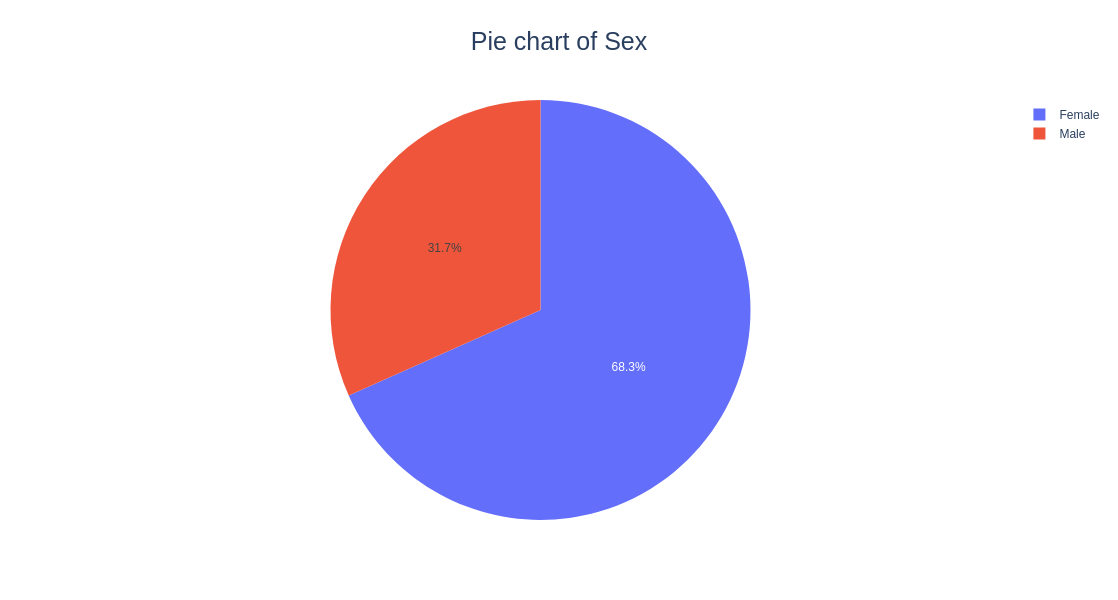

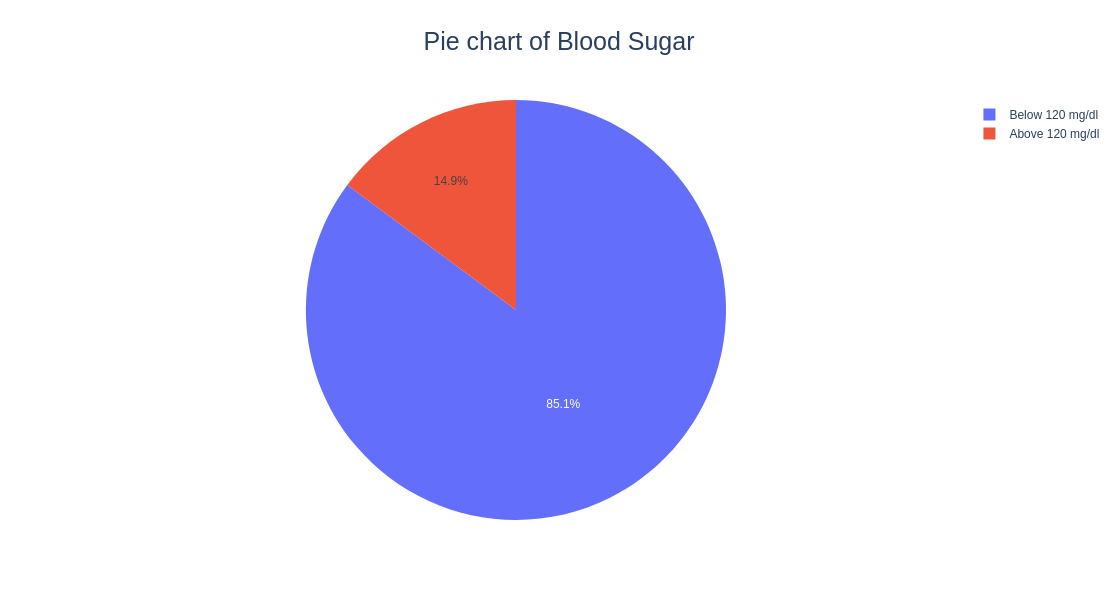

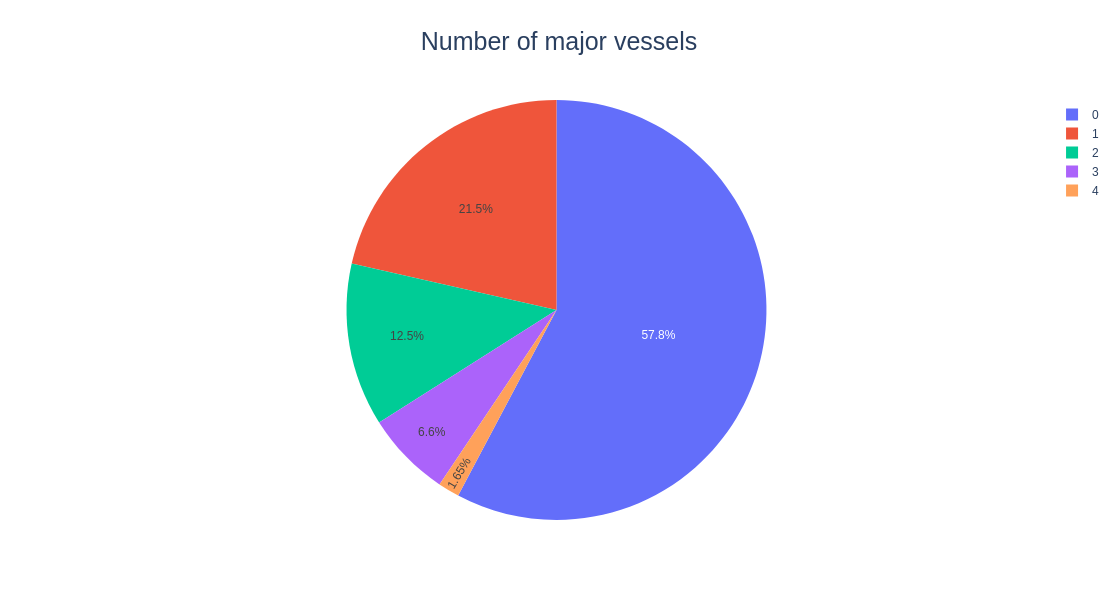

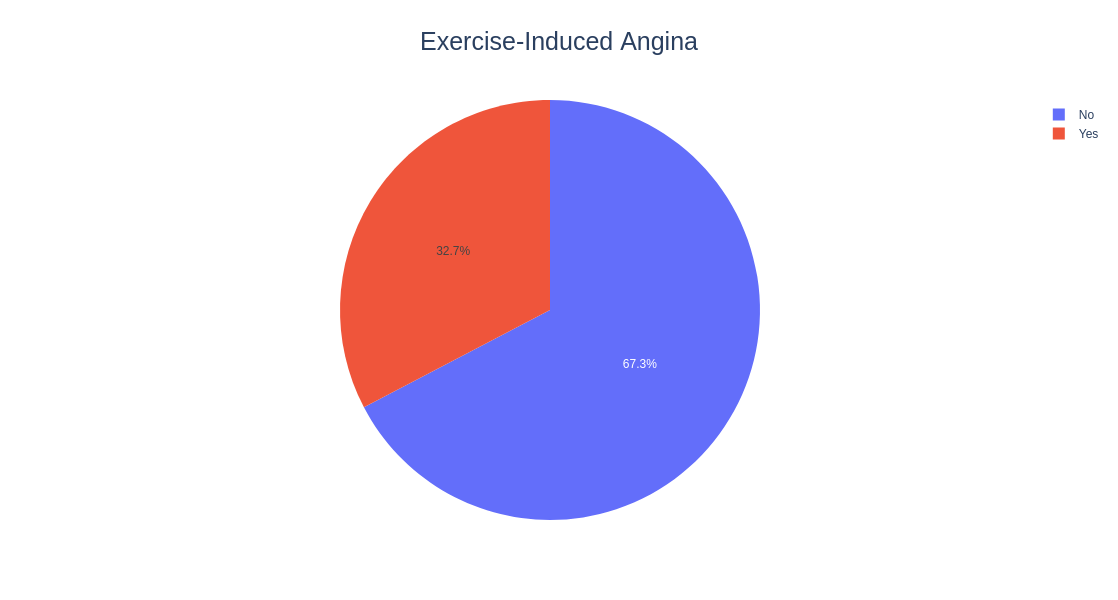

In [9]:
import plotly.express as px
#Short version of above code--

# Define a list of dictionaries containing information about each category
categories = [
    {'column': 'Sex', 'labels': ['Female', 'Male'], 'title': 'Pie chart of Sex'},
    {'column': 'Sugar Level', 'labels': ['Below 120 mg/dl', 'Above 120 mg/dl'], 'title': 'Pie chart of Blood Sugar'},
    {'column': 'Vessels Numbers', 'labels': ['0', '1', '2', '3', '4'], 'title': 'Number of major vessels'},
    {'column': 'Angina', 'labels': ['No', 'Yes'], 'title': 'Exercise-Induced Angina'}
]

# Create pie charts for each category
for category in categories:
    counts = data[category['column']].value_counts()
    fig = px.pie(names=category['labels'], values=counts.values,
                 title=category['title'],
                 labels={'names': category['column']})
                 
    # Update layout to center the title
    fig.update_layout(height=600, width=800, title={'text': category['title'], 'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})
    # Show the plot
    fig.show()


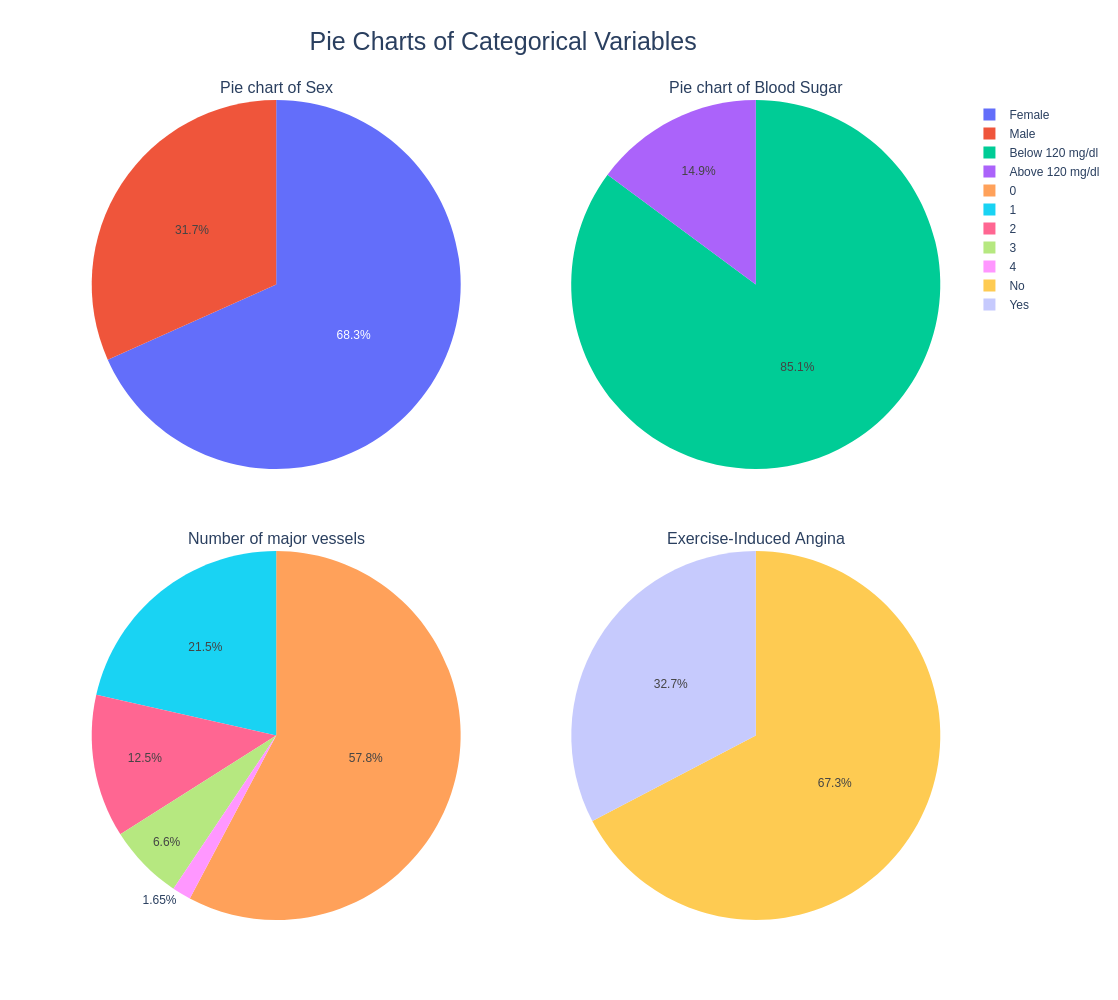

In [10]:
import plotly.express as px
from plotly.subplots import make_subplots

# Define a list of dictionaries containing information about each category
categories = [
    {'column': 'Sex', 'labels': ['Female', 'Male'], 'title': 'Pie chart of Sex'},
    {'column': 'Sugar Level', 'labels': ['Below 120 mg/dl', 'Above 120 mg/dl'], 'title': 'Pie chart of Blood Sugar'},
    {'column': 'Vessels Numbers', 'labels': ['0', '1', '2', '3', '4'], 'title': 'Number of major vessels'},
    {'column': 'Angina', 'labels': ['No', 'Yes'], 'title': 'Exercise-Induced Angina'}
]

# Create subplots with 'domain' subplot type
fig = make_subplots(rows=2, cols=2, subplot_titles=[category['title'] for category in categories],
                    specs=[[{'type': 'domain'}, {'type': 'domain'}],
                           [{'type': 'domain'}, {'type': 'domain'}]],
                   horizontal_spacing=0.1, vertical_spacing=0.1)

# Add pie charts to subplots
for i, category in enumerate(categories, start=1):
    counts = data[category['column']].value_counts()
    fig.add_trace(px.pie(names=category['labels'], values=counts.values).data[0], row=(i - 1) // 2 + 1, col=(i - 1) % 2 + 1)

# Update layout to center the title
fig.update_layout(height=1000, width=1000, title={'text': 'Pie Charts of Categorical Variables', 'x':0.45, 'xanchor': 'center', 'font': {'size': 25}})


# Show the plot
fig.show()


In [11]:
# for i, category in enumerate(categories, start=1):
#      row=(i - 1) // 2 + 1 
#      col=(i - 1) % 2 + 1
#      print(row,col)

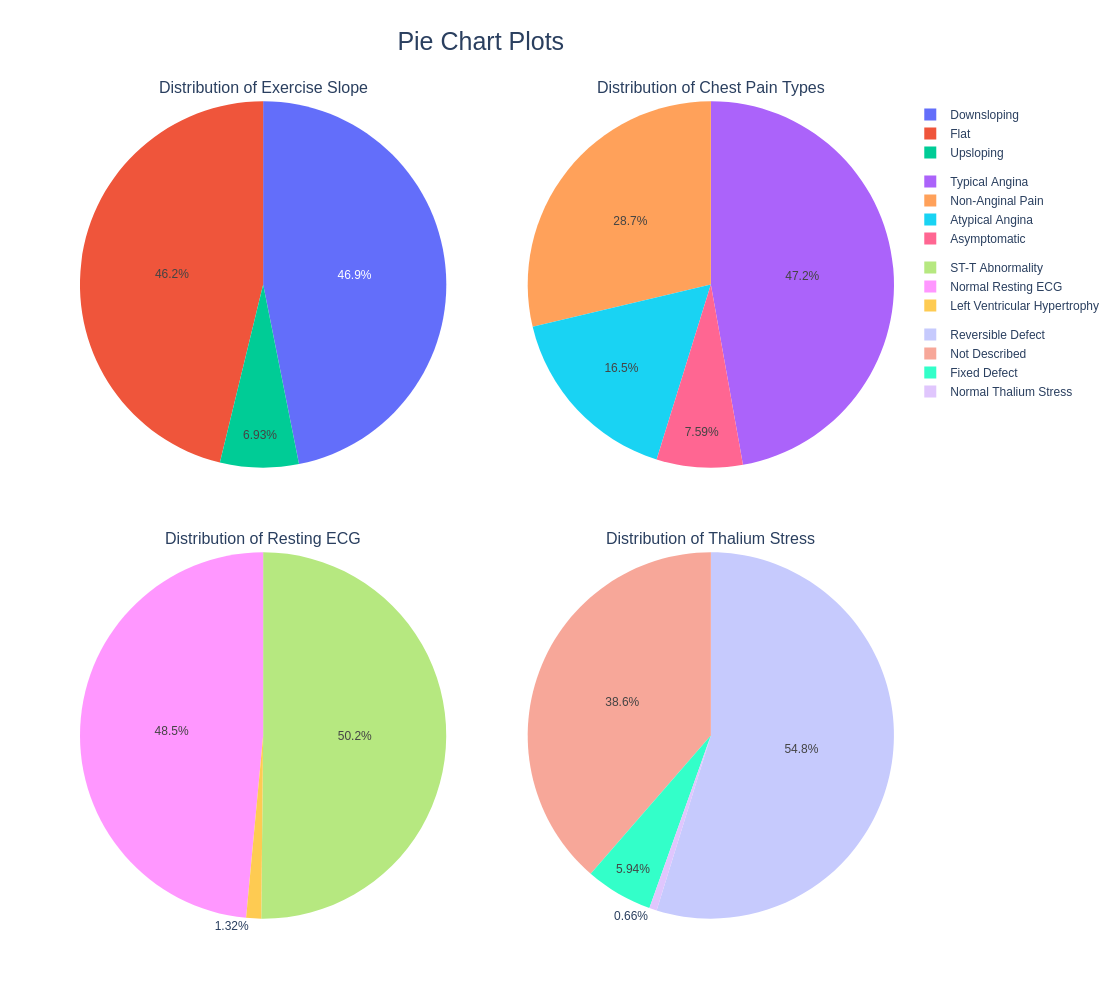

In [12]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'data' is your DataFrame

# Calculate the count of each category in the first subset
counts1 = data[['Upsloping', 'Flat', 'Downsloping']].sum()

# Calculate the count of each category in the second subset
counts2 = data[['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']].sum()

# Calculate the count of each category in the third subset
counts3 = data[['Normal Resting ECG', 'ST-T Abnormality', 'Left Ventricular Hypertrophy']].sum()

# Calculate the count of each category in the fourth subset
counts4 = data[['Normal Thalium Stress', 'Fixed Defect', 'Reversible Defect', 'Not Described']].sum()

# Create subplots
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Distribution of Exercise Slope', 'Distribution of Chest Pain Types',
                                    'Distribution of Resting ECG', 'Distribution of Thalium Stress'),
                    specs=[[{'type': 'domain'}, {'type': 'domain'}],
                           [{'type': 'domain'}, {'type': 'domain'}]],
                   horizontal_spacing=0.1, vertical_spacing=0.1)

# Add pie charts to subplots with separate legends
fig.add_trace(go.Pie(labels=counts1.index, values=counts1.values,
                     legendgroup='Exercise Slope', name='Exercise Slope'), 1, 1)
fig.add_trace(go.Pie(labels=counts2.index, values=counts2.values,
                     legendgroup='Chest Pain Types', name='Chest Pain Types'), 1, 2)
fig.add_trace(go.Pie(labels=counts3.index, values=counts3.values,
                     legendgroup='Resting ECG', name='Resting ECG'), 2, 1)
fig.add_trace(go.Pie(labels=counts4.index, values=counts4.values,
                     legendgroup='Thalium Stress', name='Thalium Stress'), 2, 2)

# Update layout
fig.update_layout(height=1000, width=1000, title={'text': 'Pie Chart Plots ', 'x':0.43, 'xanchor': 'center', 'font': {'size': 25}})

# Show the plot
fig.show()


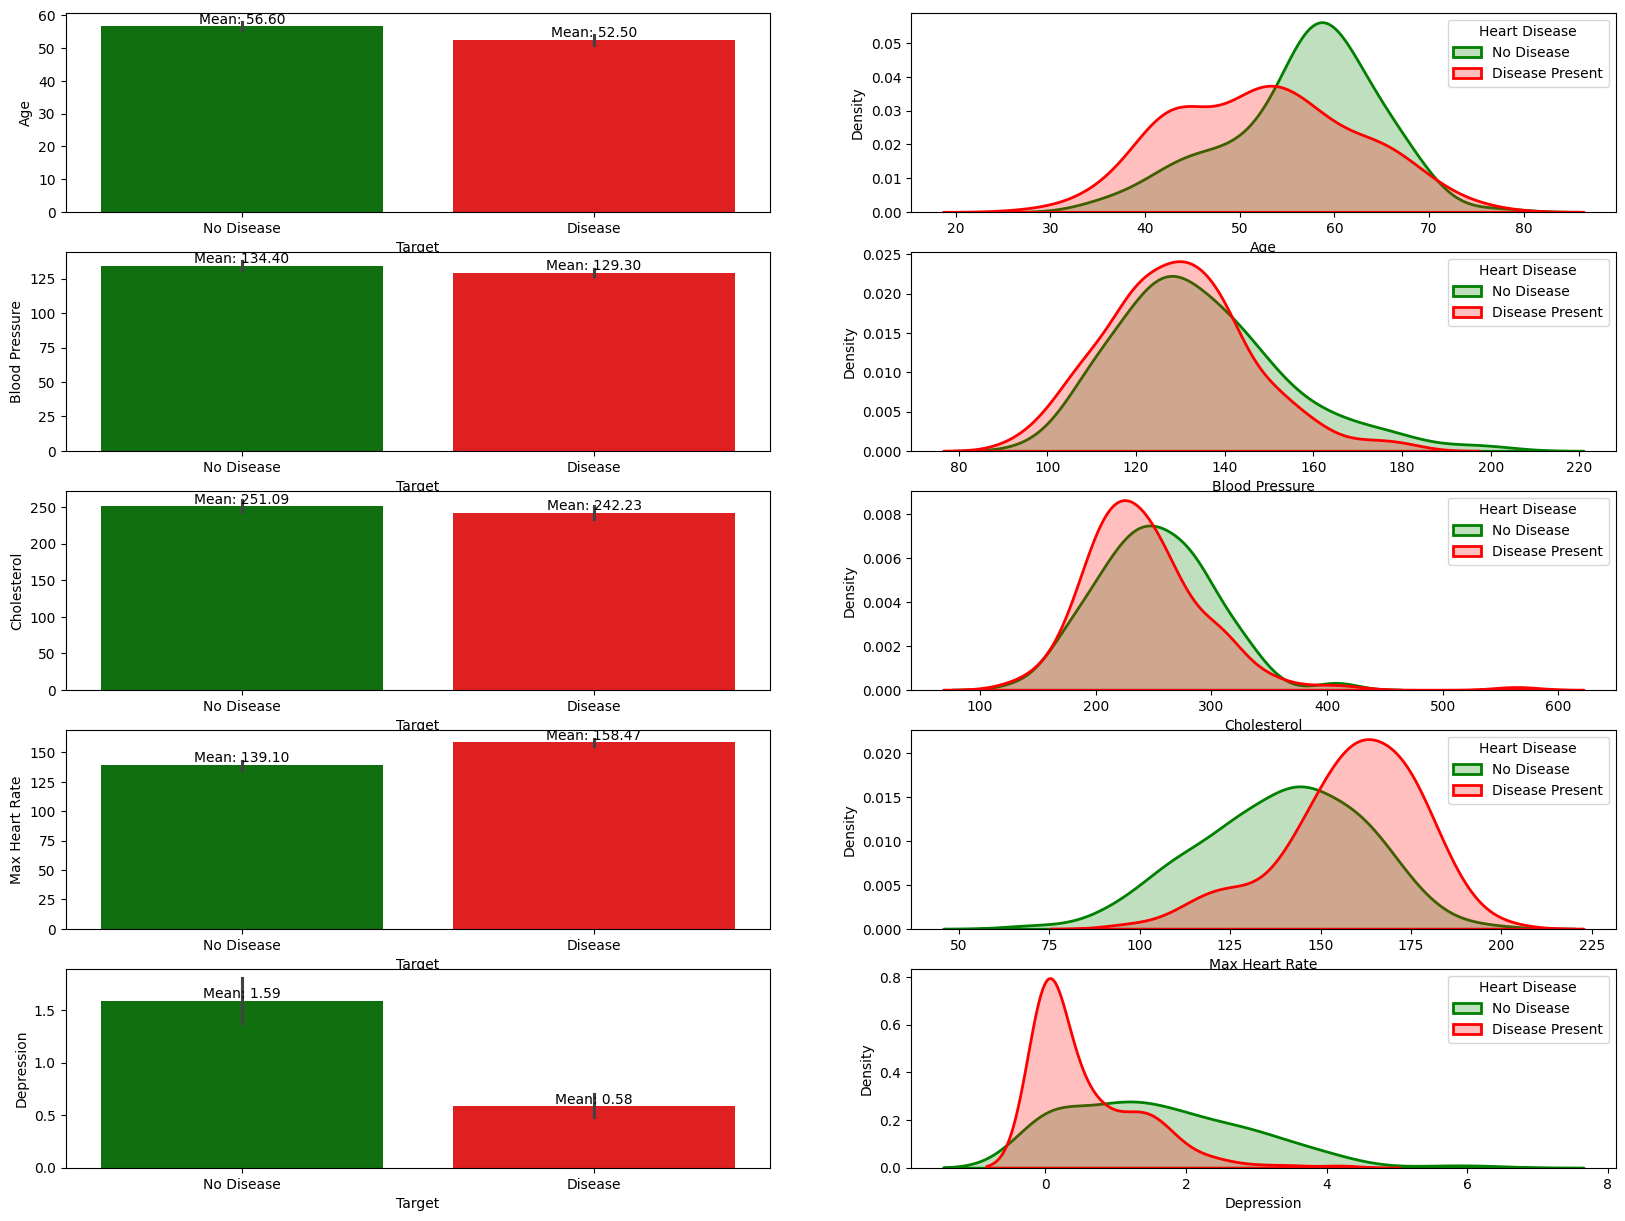

In [13]:
#BAR AND KDE PLOTS

# Define the colors for each category
colors = ['green', 'red']

# Set the color palette
sns.set_palette(colors)
columns = data[['Age', 'Blood Pressure', 'Cholesterol','Max Heart Rate','Depression']]

# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 15)) 
for i, col in enumerate(columns):
    
    # Calculate mean values for each target category
    mean_values = data.groupby('Target')[col].mean().values
    
    # Create bar plot for the first subplot
    sns.barplot(data=data, x="Target", y=col, hue="Target", palette=colors, legend=False, ax=axs[i,0])
    axs[i,0].set_xticks([0, 1])  # Set the ticks
    axs[i,0].set_xticklabels(['No Disease', 'Disease']) 
    
    # Annotate the bars with mean values
    for j, val in enumerate(mean_values):
        axs[i,0].text(j, val, f'Mean: {val:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    # Create KDE plots for each target category in the second subplot
    sns.kdeplot(data=data[data["Target"]==0][col], fill=True, linewidth=2, label='No Disease', color='green', ax=axs[i,1])
    sns.kdeplot(data=data[data["Target"]==1][col], fill=True, linewidth=2, label='Disease Present', color='red', ax=axs[i,1])
    axs[i,1].legend(title='Heart Disease', loc='upper right')

plt.show()


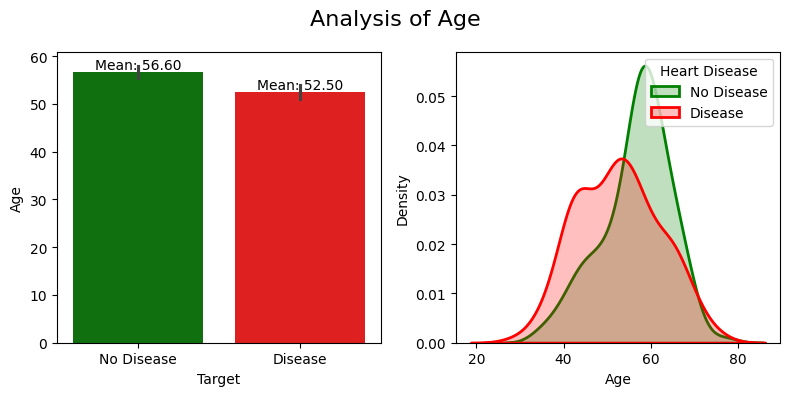

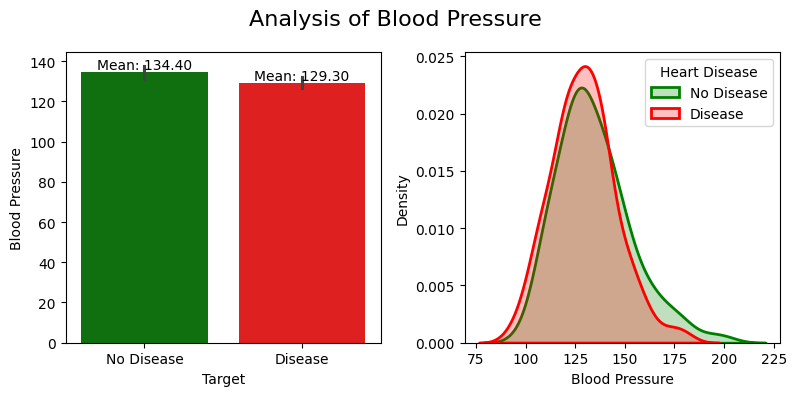

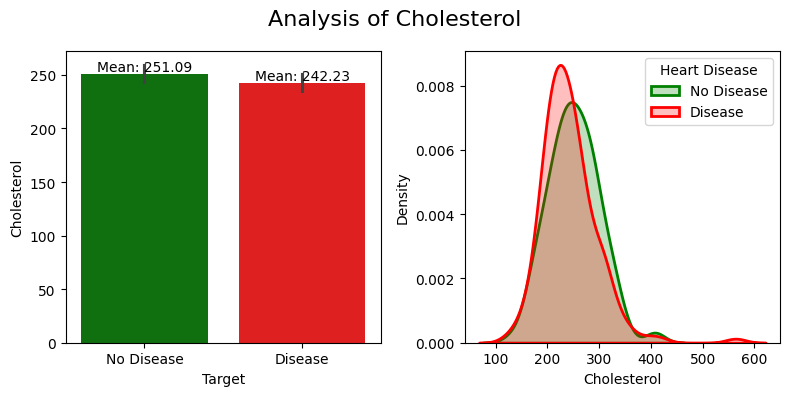

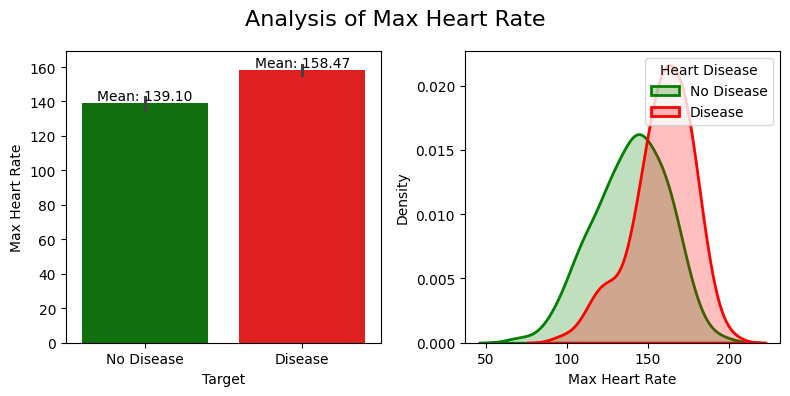

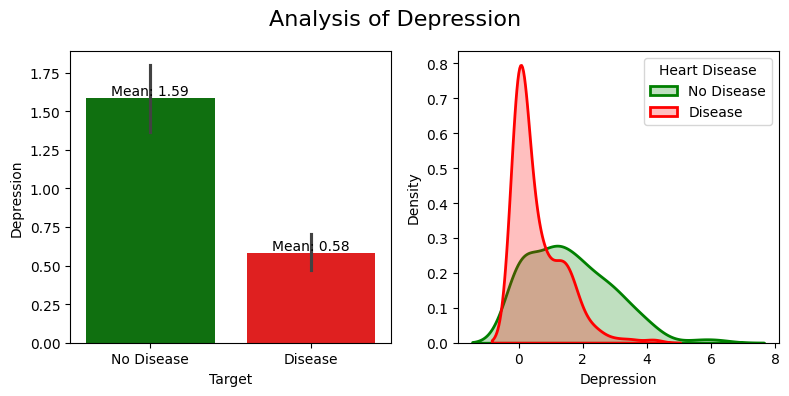

In [14]:
#BAR AND KDE PLOTS

# Define the colors for each category
colors = ['green', 'red']

# Set the color palette
sns.set_palette(colors)

# Select columns
columns = ['Age', 'Blood Pressure', 'Cholesterol', 'Max Heart Rate', 'Depression']

# Create subplots for each column
for col in columns:
    # Calculate mean values for each target category
    mean_values = data.groupby('Target')[col].mean().values
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))  
    
    # Create bar plot for the first subplot
    sns.barplot(data=data, x="Target", y=col, hue="Target", palette=colors, legend=False, ax=axs[0])
    axs[0].set_xticks([0, 1])  # Set the ticks
    axs[0].set_xticklabels(['No Disease', 'Disease']) 
                      
    # Annotate the bars with mean values
    for i, val in enumerate(mean_values):
        axs[0].text(i, val, f'Mean: {val:.2f}', ha='center', va='bottom', fontsize=10, color='black')
    
    # Create KDE plots for each target category in the second subplot
    sns.kdeplot(data=data[data["Target"]==0][col], fill=True, linewidth=2, label='No Disease', color='green', ax=axs[1])
    sns.kdeplot(data=data[data["Target"]==1][col], fill=True, linewidth=2, label='Disease', color='red', ax=axs[1])
    axs[1].legend(title='Heart Disease', loc='upper right')
    
    # Set title for the figure
    fig.suptitle(f'Analysis of {col}', fontsize=16)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()



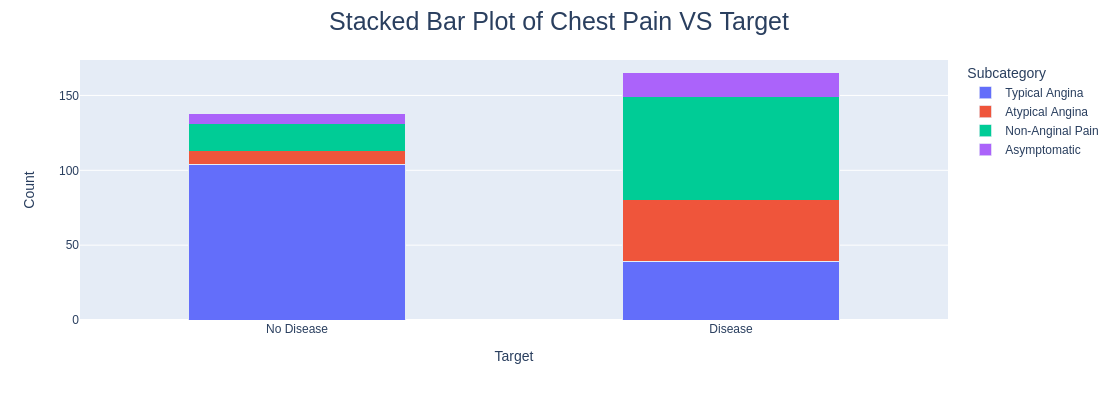

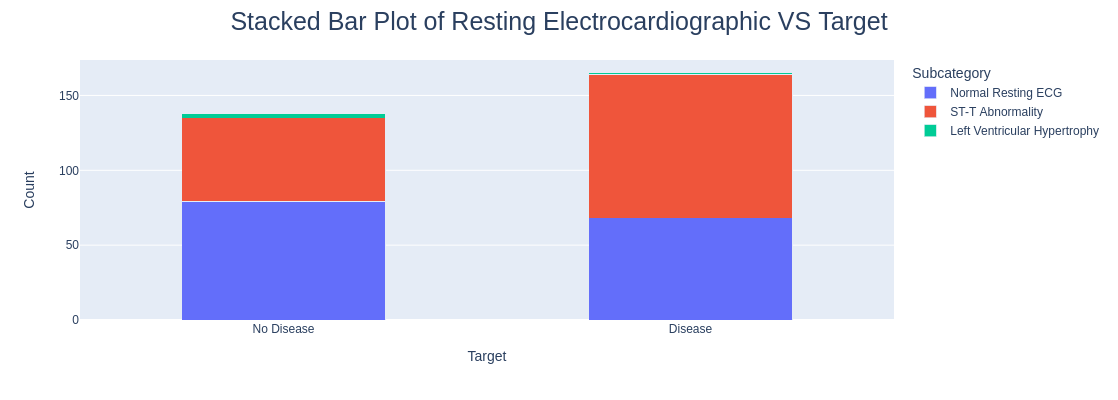

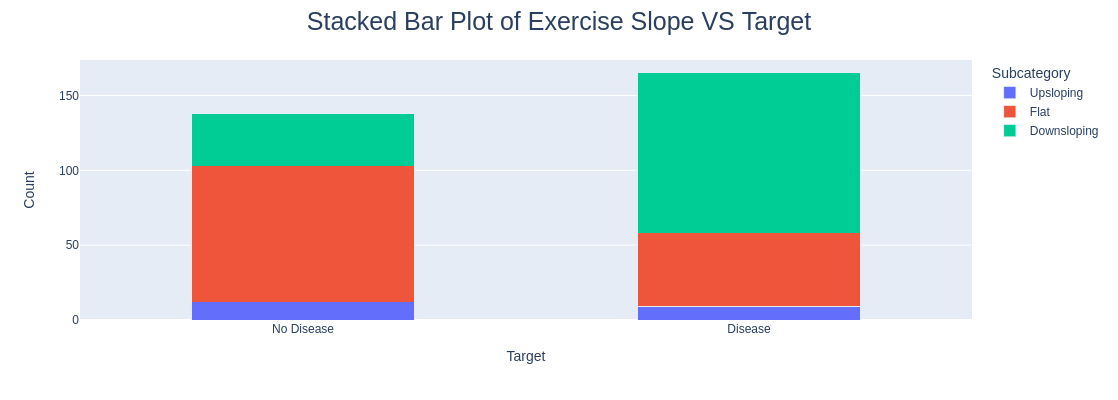

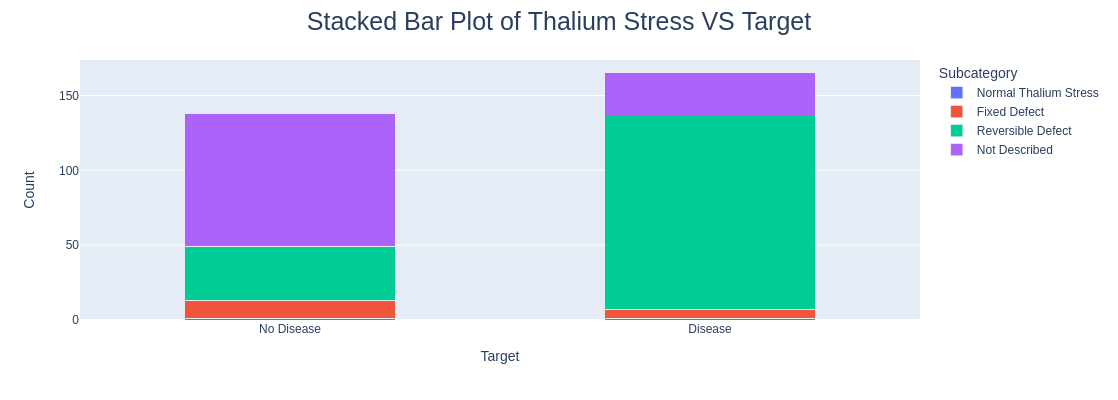

In [15]:
#STACKED BAR PLOTS

# Define the Main Categories
maincategories=['Chest Pain', 'Resting Electrocardiographic', 'Exercise Slope', 'Thalium Stress']

# Define the categories and their subcategories
categories = [['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'],
              ['Normal Resting ECG', 'ST-T Abnormality', 'Left Ventricular Hypertrophy'],
              ['Upsloping', 'Flat', 'Downsloping'],
              ['Normal Thalium Stress', 'Fixed Defect', 'Reversible Defect', 'Not Described']]

maincategories=['Chest Pain', 'Resting Electrocardiographic', 'Exercise Slope', 'Thalium Stress']

# Define the target labels
target_labels = {0: 'No Disease', 1: 'Disease'}

# Iterate over each category
for i, category in enumerate(categories):
    # Group the data by 'Target' and calculate the counts for each subcategory
    subcategory_counts = data.groupby('Target')[category].sum().reset_index()
    
    # Melt the DataFrame to have 'Target' and 'Subcategory' as categorical variables
    melted_data = subcategory_counts.melt(id_vars='Target', var_name='Subcategory', value_name='Count')
    
    # Define the order of categories on the x-axis
    category_order = {'Target': [0, 1]}
    
    # Create a stacked bar plot using Plotly Express
    fig = px.bar(melted_data, x='Target', y='Count', color='Subcategory', barmode='stack', 
                 labels={'Target': 'Target', 'Count': 'Count', 'Subcategory': 'Subcategory'},
                 category_orders=category_order)
    
    fig.update_layout(title={'text': 'Stacked Bar Plot of ' + maincategories[i] + ' VS Target', 'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})

    # Update x-axis tick labels 0 as 'No Disease' and 1 as 'Disease'
    fig.update_xaxes(tickvals=[0, 1], ticktext=[target_labels[i] for i in [0, 1]])

    # Reduce the thickness of the bars
    fig.update_traces(width=0.5)
    
    fig.update_layout(height=400, width=800)
    # Show the plot
    fig.show()


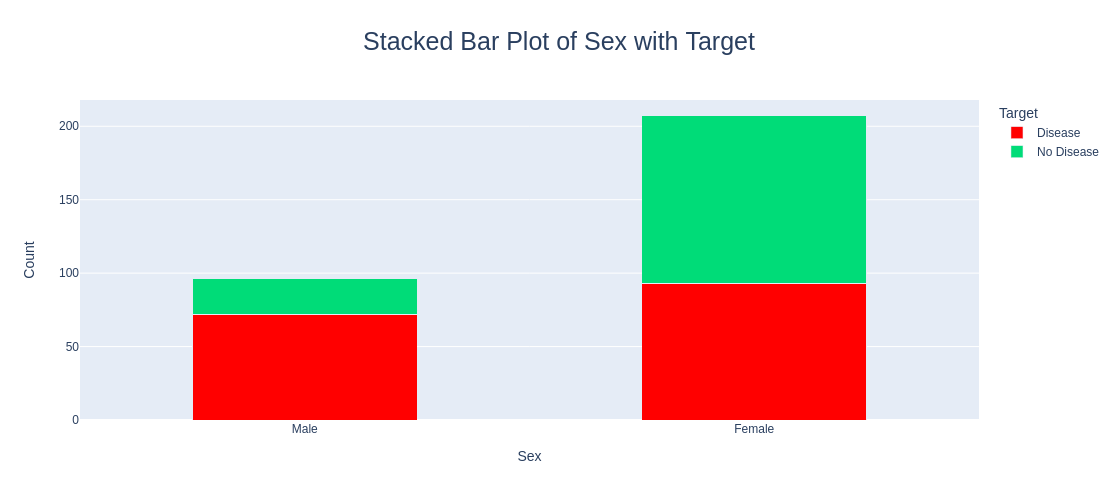

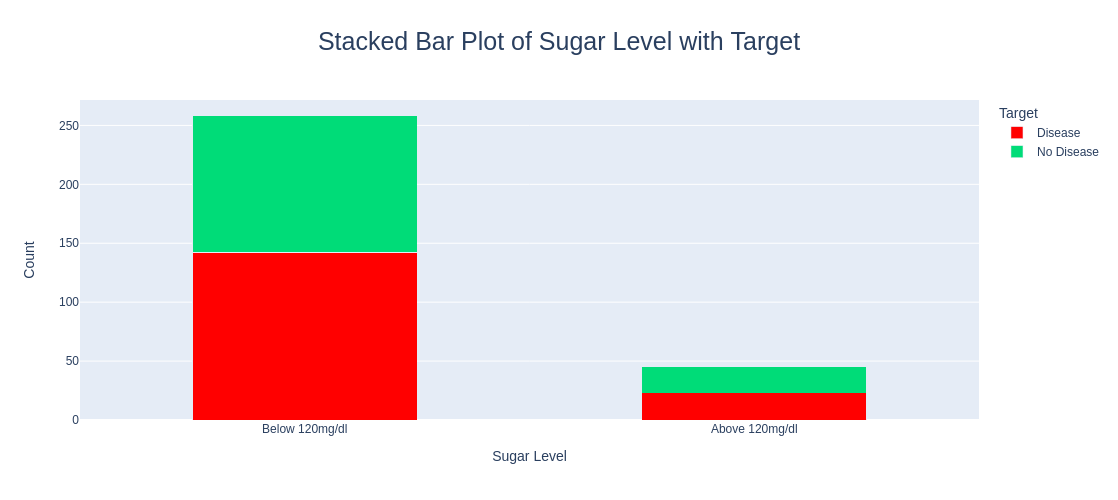

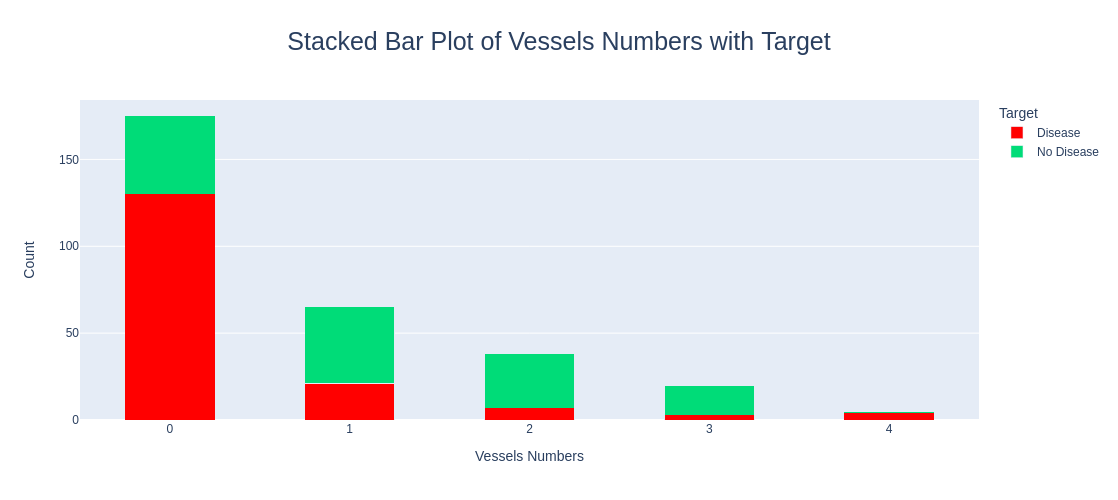

In [16]:
#STACKED BAR PLOTS

#Changing 0 as'No Disease' and 1 as 'Disease' and storing in Status
Xdata['Target'] = Xdata['Target'].replace({0: 'No Disease', 1: 'Disease'})

# Define the categories and their labels
categories = [
    ('Sex', {0: 'Male', 1: 'Female'}),
    ('Sugar Level', {0: 'Below 120mg/dl', 1: 'Above 120mg/dl'}),
    ('Vessels Numbers', {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'})
]

# Iterate over each category
for category, labels in categories:
    # Group the data by the category and 'Target' and calculate the counts
    category_target_counts = Xdata.groupby([category, 'Target']).size().unstack(fill_value=0).reset_index()

    # Melt the DataFrame to have the category and 'Target' as categorical variables
    melted_data = category_target_counts.melt(id_vars=category, var_name='Target', value_name='Count')

    # Create a stacked bar plot for the category with 'Target'
    fig = px.bar(melted_data, x=category, y='Count', color='Target', barmode='stack',
                 labels={category: category, 'Count': 'Count', 'Target': 'Target'},
                 title=f'Stacked Bar Plot of {category} with Target',
                 category_orders={category: sorted(data[category].unique())},
                 color_discrete_map={'No Disease': 'rgb(0,220,120)', 'Disease': 'red'})

    
    # Update x-axis tick labels
    fig.update_xaxes(tickvals=sorted(data[category].unique()), ticktext=[labels[i] for i in sorted(data[category].unique())])

    #Keep title at center
    fig.update_layout(height=1000, width=1000, title={'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})

    # Reduce the thickness of the bars
    fig.update_traces(width=0.5)
    
    # Reduce the thickness of the bars
    fig.update_traces(width=0.5)
    
    fig.update_layout(height=500, width=800)
    # Show the plot
    fig.show()


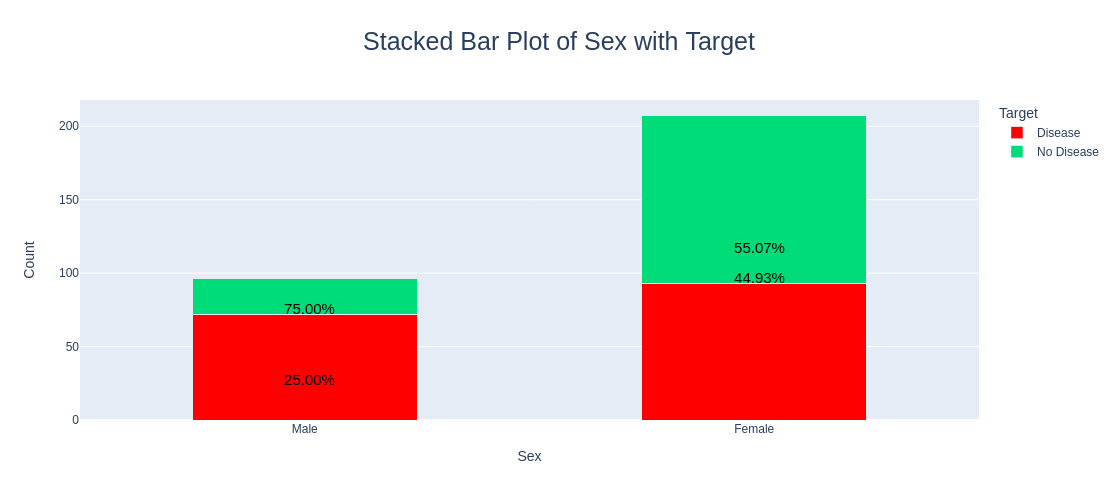

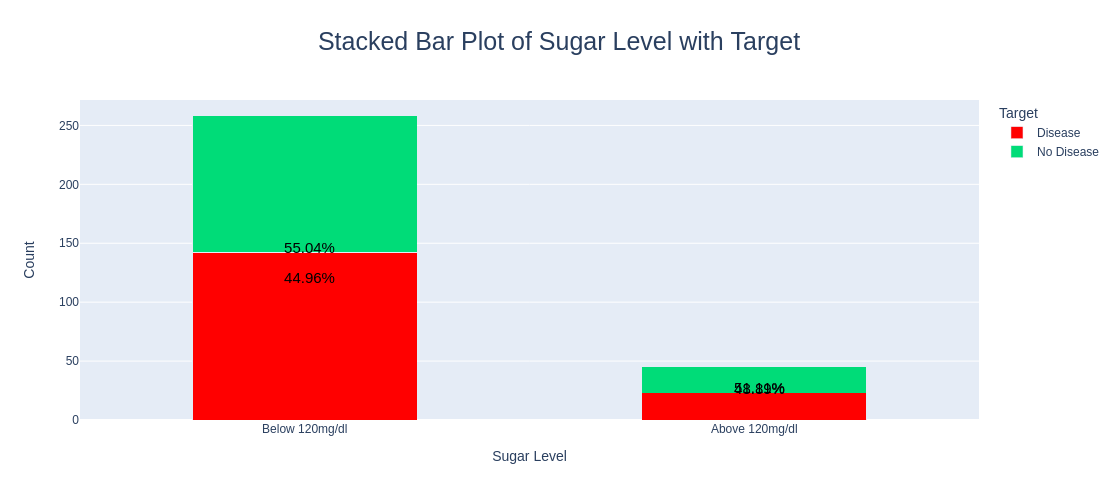

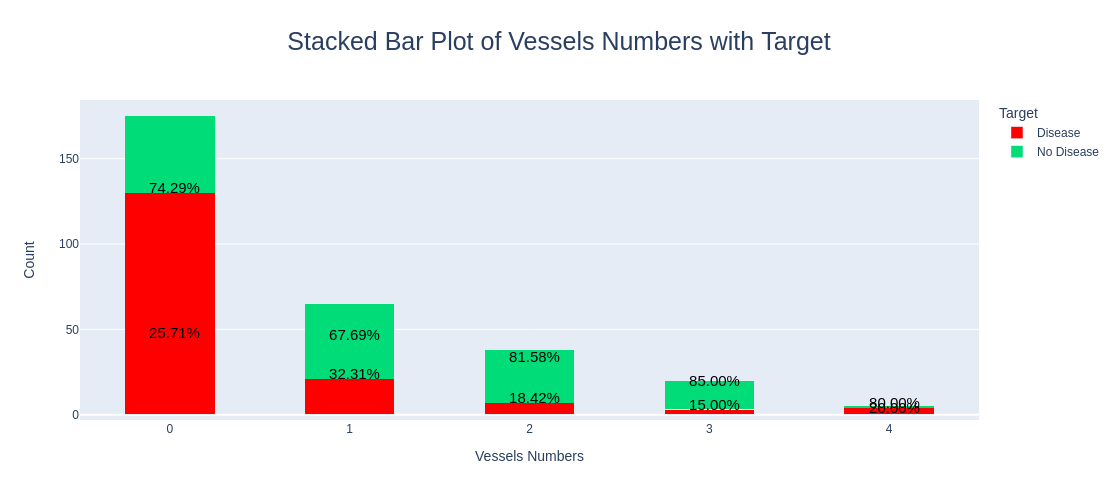

In [17]:
import plotly.express as px

# Changing 0 as 'No Disease' and 1 as 'Disease' and storing in Status
Xdata['Target'] = Xdata['Target'].replace({0: 'No Disease', 1: 'Disease'})

# Define the categories and their labels
categories = [
    ('Sex', {0: 'Male', 1: 'Female'}),
    ('Sugar Level', {0: 'Below 120mg/dl', 1: 'Above 120mg/dl'}),
    ('Vessels Numbers', {0: '0', 1: '1', 2: '2', 3: '3', 4: '4'})
]

# Iterate over each category
for category, labels in categories:
    # Group the data by the category and 'Target' and calculate the counts
    category_target_counts = Xdata.groupby([category, 'Target']).size().unstack(fill_value=0).reset_index()

    # Melt the DataFrame to have the category and 'Target' as categorical variables
    melted_data = category_target_counts.melt(id_vars=category, var_name='Target', value_name='Count')

    # Calculate total counts for each category
    total_counts = melted_data.groupby(category)['Count'].transform('sum')

    # Calculate percentages
    melted_data['Percentage'] = (melted_data['Count'] / total_counts) * 100

    # Create a stacked bar plot for the category with 'Target'
    fig = px.bar(melted_data, x=category, y='Count', color='Target', barmode='stack',
                 labels={category: category, 'Count': 'Count', 'Target': 'Target'},
                 title=f'Stacked Bar Plot of {category} with Target',
                 category_orders={category: sorted(data[category].unique())},
                 color_discrete_map={'No Disease': 'rgb(0,220,120)', 'Disease': 'red'})

    # Annotate bars with percentages
    for i, row in melted_data.iterrows():
        fig.add_annotation(x=row[category], y=row['Count'], 
                           text=f'{row["Percentage"]:.2f}%', showarrow=False,
                           font=dict(color='black', size=15), xshift=5, yshift=5) #!for each plot xshift and yshift have to change
        fig.update_traces(textposition="inside")

    # Update x-axis tick labels
    fig.update_xaxes(tickvals=sorted(data[category].unique()), ticktext=[labels[i] for i in sorted(data[category].unique())])

    # Keep title at center
    fig.update_layout(height=500, width=800, title={'x':0.5, 'xanchor': 'center', 'font': {'size': 25}})

    # Reduce the thickness of the bars
    fig.update_traces(width=0.5)

    # Show the plot
    fig.show()


<span style="font-size: 30px;">Model Trainnig and Predictions .</span>

In [18]:
# Define the features (X) and the output labels (Y)
X = data.drop('Target', axis=1)
Y = data['Target'] 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20)


In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
sc = StandardScaler()
column_names=X.columns

# X contains features, y contains target variable

# Apply transformations to training and test sets
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(np.shape(X_train),np.shape(X_test))
X_train=pd.DataFrame(X_train,columns=column_names)
X_test=pd.DataFrame(X_test,columns=column_names)

(242, 23) (61, 23)


<span style="font-size: 30px;">Model 1: Logistic Regression .</span>

In [20]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


model1 = LogisticRegression()
model1.fit(X_train, Y_train)

Y_Pred1=model1.predict(X_test)

# Calculate and print classification metrics
Accuracy1 = "{:.2f}".format(accuracy_score(Y_test, Y_Pred1))
Precision1 = "{:.2f}".format(precision_score(Y_test, Y_Pred1))
Recall1 = "{:.2f}".format(recall_score(Y_test, Y_Pred1))
F1_Score1 = "{:.2f}".format(f1_score(Y_test, Y_Pred1))

# print("Model 1: Logistic Regression")
# print("Accuracy score: ", Accuracy1)
# print("Precision score: ", Precision1)
# print("Recall score: ", Recall1)
# print("F1 score: ", F1_Score1)

In [21]:
Prediction=pd.DataFrame({'Actual Disease Status':Y_test,'Predicted Disease Status':Y_Pred1,'Difference':Y_test-Y_Pred1})
#Prediction


<span style="font-size: 30px;">Model 2: Neural Network.</span>

In [22]:
#Prediction Using Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

model2 = Sequential([
  Dense(units=32, activation='relu'),
  Dense(units=10, activation='relu'),
  Dense(units=1, activation='sigmoid'),
])

model2.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='mse')
fitmod2=model2.fit(X_train,Y_train, epochs=100,batch_size=64)


2024-04-25 16:13:21.171437: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 16:13:26.120227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/100


2024-04-25 16:13:29.527222: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5649 - loss: 0.2396  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6274 - loss: 0.2248 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6521 - loss: 0.2218 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6893 - loss: 0.2129 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7568 - loss: 0.1959 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7718 - loss: 0.1899 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.1873 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7853 - loss: 0.1806 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.1723 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8368 - loss: 0.1633 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.1564 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8448 - loss: 0.1496 


In [23]:
model2.summary()
Y_Pred2 = model2.predict(X_test)
Y_Pred2 = Y_Pred2.flatten()
#updatin values < 0.5 == 0 and values >0.5 == 1
Y_Pred2 = np.where(Y_Pred2 < 0.5, 0, 1)
Prediction2=pd.DataFrame({'Actual Disease Status':Y_test,'Predicted Disease Status':Y_Pred2,'Difference':Y_test-Y_Pred2})
#Prediction2

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.01 KB)

 Trainable params: 1,109 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,220 (8.68 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [24]:
# Calculate and print classification metrics
Accuracy2 = "{:.2f}".format(accuracy_score(Y_test, Y_Pred2))
Precision2 = "{:.2f}".format(precision_score(Y_test, Y_Pred2))
Recall2 = "{:.2f}".format(recall_score(Y_test, Y_Pred2))
F1_Score2 = "{:.2f}".format(f1_score(Y_test, Y_Pred2))

# print("Model 2: Neural Network")
# print("Accuracy score: ", Accuracy2)
# print("Precision score: ", Precision2)
# print("Recall score: ", Recall2)
# print("F1 score: ", F1_Score2)

In [25]:
# X = DATA.drop('Target', axis=1)
# Y = DATA['Target'] 

# from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

<span style="font-size: 30px;">Model 3: Support Vector Machine (SVM).</span>

In [26]:
from sklearn.svm import SVC

# Training and testing SVM Classifier
model3 = SVC()
model3.fit(X_train, Y_train)
Y_Pred3 = model3.predict(X_test)

# Calculate and print classification metrics
Accuracy3 = "{:.2f}".format(accuracy_score(Y_test, Y_Pred3))
Precision3 = "{:.2f}".format(precision_score(Y_test, Y_Pred3))
Recall3 = "{:.2f}".format(recall_score(Y_test, Y_Pred3))
F1_Score3 = "{:.2f}".format(f1_score(Y_test, Y_Pred3))


<span style="font-size: 30px;">Model 4: Gaussian Naive Bayes.</span>

In [27]:
from sklearn.naive_bayes import GaussianNB

# Training and testing Naive Bayes Classifier
model4 = GaussianNB()
model4.fit(X_train, Y_train)
Y_Pred4 = model4.predict(X_test)

# Calculate and print classification metrics
Accuracy4 = "{:.2f}".format(accuracy_score(Y_test, Y_Pred4))
Precision4 = "{:.2f}".format(precision_score(Y_test, Y_Pred4))
Recall4 = "{:.2f}".format(recall_score(Y_test, Y_Pred4))
F1_Score4 = "{:.2f}".format(f1_score(Y_test, Y_Pred4))


<span style="font-size: 30px;">Model 5: Random Forest.</span>

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Training and testing Random Forest Classifier
model5 = RandomForestClassifier(random_state=18)
model5.fit(X_train, Y_train)
Y_Pred5 = model5.predict(X_test)

# Calculate and print classification metrics
Accuracy5 = "{:.2f}".format(accuracy_score(Y_test, Y_Pred5))
Precision5 = "{:.2f}".format(precision_score(Y_test, Y_Pred5))
Recall5 = "{:.2f}".format(recall_score(Y_test, Y_Pred5))
F1_Score5 = "{:.2f}".format(f1_score(Y_test, Y_Pred5))


<span style="font-size: 30px;">Model 6: Bernoulli Naive Bayes.</span>

In [29]:
# Bernoulli Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

model6 = BernoulliNB()
model6.fit(X_train, Y_train)

Y_Pred6 = model6.predict(X_test)

# Calculate and print classification metrics
Accuracy6 = "{:.2f}".format(accuracy_score(Y_test, Y_Pred6))
Precision6 = "{:.2f}".format(precision_score(Y_test, Y_Pred6))
Recall6 = "{:.2f}".format(recall_score(Y_test, Y_Pred6))
F1_Score6 = "{:.2f}".format(f1_score(Y_test, Y_Pred6))

# print("Model 6 : Bernoulli Naive Bayes")
# print("Accuracy score: ", Accuracy6)
# print("Precision score: ", Precision6)
# print("Recall score: ", Recall6)
# print("F1 score: ", F1_Score6)

In [30]:
#Creating dataframe for Table
score={'METHOD' : ["Logistic Regression", "Nueral Network", "Support Vector Machine","Gaussian Naive Bayes","Random Forest", "Bernoulli Naive Bayes" ],
    'Accuracy score' : [Accuracy1, Accuracy2, Accuracy3, Accuracy4, Accuracy5, Accuracy6],
    'Precision score' : [Precision1, Precision2, Precision3, Precision4, Precision6, Precision6],
    'Recall score' : [Recall1, Recall2, Recall3, Recall4, Recall4, Recall6],
    'F1 score' : [F1_Score1, F1_Score2, F1_Score3, F1_Score4, F1_Score4, F1_Score6]}
score_df=pd.DataFrame(score).set_index('METHOD')

score_df

Accuracy score Precision score Recall score F1 score
METHOD                                                                     
Logistic Regression              0.80            0.84         0.79     0.81
Nueral Network                   0.82            0.82         0.85     0.84
Support Vector Machine           0.79            0.79         0.82     0.81
Gaussian Naive Bayes             0.82            0.82         0.85     0.84
Random Forest                    0.80            0.87         0.85     0.84
Bernoulli Naive Bayes            0.82            0.87         0.79     0.83

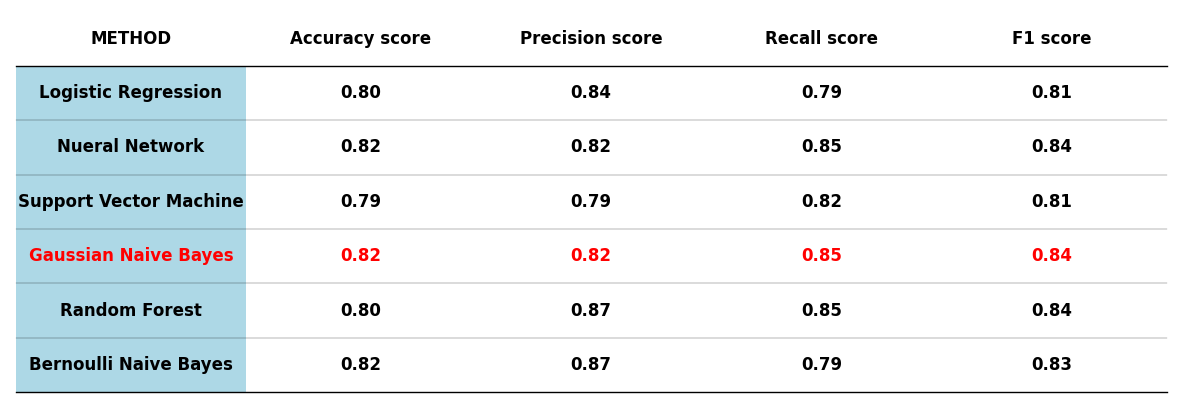

In [31]:

from plottable import Table
from plottable import ColumnDefinition

fig, ax = plt.subplots(figsize=(15, 5))

# Create the Table() object
#tab = Table(err_df)
#OR

tab = Table(score_df,textprops={"ha": "center","fontsize": "12", "weight": "bold"},footer_divider=True)

# Change the color and fontsize of columns data
tab.columns['METHOD'].set_facecolor("lightblue")

#change fontsize for specific column
#tab.columns["METHOD"].set_fontsize("12")


tab.columns['Accuracy score'].set_fontcolor("black")
#tab.columns["Mean Absolute Error"].set_fontsize("12")

tab.columns['Precision score'].set_fontcolor("black")
#tab.columns["Mean Squared Error"].set_fontsize("12")

tab.columns['Recall score'].set_fontcolor("black")
#tab.columns["R-Squared"].set_fontsize("12")  

tab.columns['F1 score'].set_fontcolor("black")
#tab.columns["R-Squared"].set_fontsize("12") 

#change color of second row values
tab.rows[3].set_fontcolor("red")


# Display the output
plt.show()

#Save table in png format
#fig.savefig("/home/mohit/Downloads/Error vs Method Tabel for sales prediction.png")

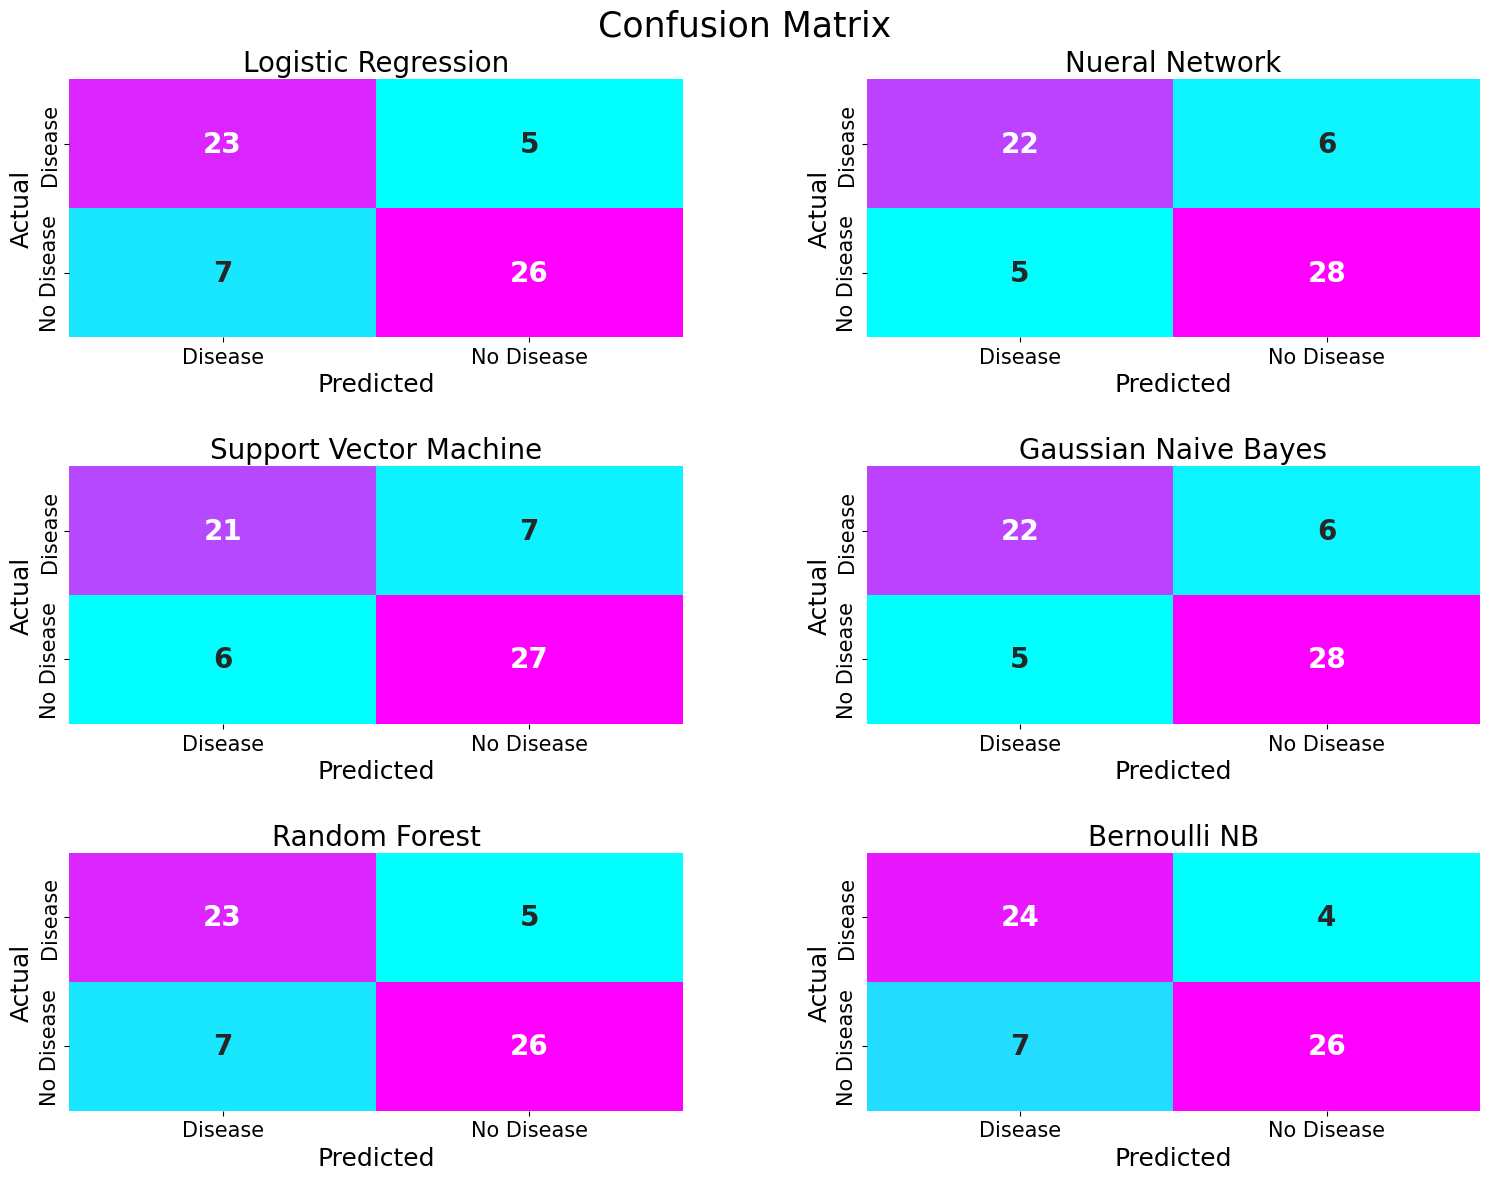

In [32]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix

Classes = Xdata['Target'].unique()  # No Disease / Disease 
mod = [("Logistic Regression", Y_Pred1),("Nueral Network", Y_Pred2),("Support Vector Machine", Y_Pred3),("Gaussian Naive Bayes", Y_Pred4), ("Random Forest", Y_Pred5), ("Bernoulli NB", Y_Pred6)]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for (model_name, Pred), ax in zip(mod, axes.flatten()):
    Conf_Mat = confusion_matrix(Y_test, Pred)
    sns.heatmap(Conf_Mat, annot=True, fmt="d", cmap="cool", cbar=False,xticklabels=Classes, yticklabels=Classes, ax=ax, annot_kws={"fontweight": "bold", "fontsize": 20})
    
    ax.set_title(f"{model_name}", fontsize=20)   #Set title of subplots
    ax.set_xlabel("Predicted", fontsize=18)      # Set x-axis labels font size
    ax.set_ylabel("Actual", fontsize=18)         # Set y-axis labels font size
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)  # Set x-axis tick labels font size
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)  # Set y-axis tick labels font size
    
fig.suptitle("Confusion Matrix", fontsize=25) #Set main title of subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust the gap between subplots
plt.show()
